In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
import math
import requests
import io
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',1000)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('/content/drive/My Drive/Copy of US_Accidents_June20.csv') #,nrows=10000)
redunCol=['ID','Source','End_Lat','End_Lng','Number','Street','Zipcode','Country','Weather_Timestamp'
            ,'Airport_Code','Astronomical_Twilight','Civil_Twilight','Nautical_Twilight']
df=df.drop(redunCol,axis=1)
df

,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Side,City,County,State,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,R,Dayton,Montgomery,OH,US/Eastern,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,L,Reynoldsburg,Franklin,OH,US/Eastern,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,R,Williamsburg,Clermont,OH,US/Eastern,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,R,Dayton,Montgomery,OH,US/Eastern,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,R,Dayton,Montgomery,OH,US/Eastern,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,R,Riverside,Riverside,CA,US/Pacific,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
3513613,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,R,San Diego,San Diego,CA,US/Pacific,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
3513614,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,R,Orange,Orange,CA,US/Pacific,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day
3513615,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,R,Culver City,Los Angeles,CA,US/Pacific,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


## Data Cleaning

In [4]:
redunCol=['TMC','Start_Time','End_Time','Description','City','County','State','Timezone','Distance(mi)','Wind_Direction']
df=df.drop(redunCol,axis=1)

In [5]:
df.loc[df['Side']=='R','Side']=1 #Right side is 1
df.loc[df['Side']=='L','Side']=0 #Left side is 
df.loc[df['Sunrise_Sunset']=='Day','Sunrise_Sunset']=0 #daytime is 0
df.loc[df['Sunrise_Sunset']=='Night','Sunrise_Sunset']=1 #nighttime is 1
df

,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,39.865147,-84.058723,1,36.9,NaN,91.0,29.68,10.0,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1
1,2,39.928059,-82.831184,0,37.9,NaN,100.0,29.65,10.0,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,2,39.063148,-84.032608,1,36.0,33.3,100.0,29.67,10.0,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,1
3,3,39.747753,-84.205582,1,35.1,31.0,96.0,29.64,9.0,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,2,39.627781,-84.188354,1,36.0,33.3,89.0,29.65,6.0,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2,34.002480,-117.379360,1,86.0,86.0,40.0,28.92,10.0,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3513613,2,32.766960,-117.148060,1,70.0,70.0,73.0,29.39,10.0,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3513614,2,33.775450,-117.847790,1,73.0,73.0,64.0,29.74,10.0,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,0
3513615,2,33.992460,-118.403020,1,71.0,71.0,81.0,29.62,10.0,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [7]:
cols=df['Weather_Condition'].unique()
for col in cols:
    df[col] = df['Weather_Condition'] == col

In [6]:
del(df['Wind_Chill(F)'])
df["Precipitation(in)"].fillna(0, inplace = True)
df['Wind_Speed(mph)'].fillna((df['Wind_Speed(mph)'].mean()), inplace = False)
df

,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,39.865147,-84.058723,1,36.9,91.0,29.68,10.0,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1
1,2,39.928059,-82.831184,0,37.9,100.0,29.65,10.0,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,1
2,2,39.063148,-84.032608,1,36.0,100.0,29.67,10.0,3.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,1
3,3,39.747753,-84.205582,1,35.1,96.0,29.64,9.0,4.6,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,2,39.627781,-84.188354,1,36.0,89.0,29.65,6.0,3.5,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,2,34.002480,-117.379360,1,86.0,40.0,28.92,10.0,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3513613,2,32.766960,-117.148060,1,70.0,73.0,29.39,10.0,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3513614,2,33.775450,-117.847790,1,73.0,64.0,29.74,10.0,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,0
3513615,2,33.992460,-118.403020,1,71.0,81.0,29.62,10.0,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [8]:
df = df.dropna()
del(df['Weather_Condition'])

In [9]:
df=df.sample(n=1000000, random_state=1)

In [10]:
df

,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Light Rain,...,Partial Fog / Windy,Light Snow with Thunder,Widespread Dust / Windy,Sand / Dust Whirlwinds / Windy,Tornado,Snow and Thunder,Snow and Sleet / Windy,Heavy Snow with Thunder,Thunder / Wintry Mix / Windy,Light Snow Showers,Heavy Blowing Snow,Light Hail,Heavy Smoke,Heavy Thunderstorms with Small Hail,Light Thunderstorm,Heavy Freezing Drizzle,Light Blowing Snow,Thunderstorms and Snow,Freezing Rain / Windy,Dust Whirls,Sand / Dust Whirls Nearby,Heavy Rain Shower,Thunder and Hail,Drifting Snow,Thunder and Hail / Windy
694610,2,41.214500,-111.978989,0,24.0,71.0,25.29,5.0,14.0,0.00,False,False,True,False,False,False,False,False,False,True,False,False,False,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1036014,2,35.791061,-78.651611,1,79.0,88.0,29.66,10.0,0.0,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2602907,2,34.440420,-118.599810,1,64.0,11.0,29.11,10.0,10.0,0.00,False,False,False,False,True,False,False,False,False,False,False,False,False,1,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3208166,2,40.544130,-111.951887,0,32.2,68.0,30.28,10.0,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2092667,3,33.691933,-117.337677,1,48.2,46.0,30.14,10.0,5.8,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121417,2,38.547530,-112.373840,1,38.0,79.0,25.24,10.0,3.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2069743,4,42.291107,-83.838654,1,21.9,85.0,30.15,1.5,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2230268,3,32.675133,-97.006790,1,91.4,18.0,29.83,10.0,12.7,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3234174,4,29.603440,-95.202790,1,80.1,81.0,29.85,10.0,6.9,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Splitting into features and severity

In [11]:
y = df['Severity'].copy()
y

694610     2
1036014    2
2602907    2
3208166    2
2092667    3
          ..
3121417    2
2069743    4
2230268    3
3234174    4
1400137    2
Name: Severity, Length: 1000000, dtype: int64

In [12]:
x = df.drop(['Severity'], axis = 1)
x

,Start_Lat,Start_Lng,Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Light Rain,Overcast,...,Partial Fog / Windy,Light Snow with Thunder,Widespread Dust / Windy,Sand / Dust Whirlwinds / Windy,Tornado,Snow and Thunder,Snow and Sleet / Windy,Heavy Snow with Thunder,Thunder / Wintry Mix / Windy,Light Snow Showers,Heavy Blowing Snow,Light Hail,Heavy Smoke,Heavy Thunderstorms with Small Hail,Light Thunderstorm,Heavy Freezing Drizzle,Light Blowing Snow,Thunderstorms and Snow,Freezing Rain / Windy,Dust Whirls,Sand / Dust Whirls Nearby,Heavy Rain Shower,Thunder and Hail,Drifting Snow,Thunder and Hail / Windy
694610,41.214500,-111.978989,0,24.0,71.0,25.29,5.0,14.0,0.00,False,False,True,False,False,False,False,False,False,True,False,False,False,0,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1036014,35.791061,-78.651611,1,79.0,88.0,29.66,10.0,0.0,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,0,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2602907,34.440420,-118.599810,1,64.0,11.0,29.11,10.0,10.0,0.00,False,False,False,False,True,False,False,False,False,False,False,False,False,1,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3208166,40.544130,-111.951887,0,32.2,68.0,30.28,10.0,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2092667,33.691933,-117.337677,1,48.2,46.0,30.14,10.0,5.8,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121417,38.547530,-112.373840,1,38.0,79.0,25.24,10.0,3.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2069743,42.291107,-83.838654,1,21.9,85.0,30.15,1.5,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2230268,32.675133,-97.006790,1,91.4,18.0,29.83,10.0,12.7,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3234174,29.603440,-95.202790,1,80.1,81.0,29.85,10.0,6.9,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,1,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Splitting into tranning, test and validation datasets

In [13]:
x_train1, x_test, y_train1, y_test = train_test_split(x,y,test_size=0.1, random_state=42, shuffle=True)

In [14]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train1,y_train1,test_size=0.167, random_state=42, shuffle=True)

In [ ]:
mask1 = (df['Severity'] == 1)
mask2 = (df['Severity'] == 2)
mask3 = (df['Severity'] == 3)
mask4 = (df['Severity'] == 4)

ratio2 = len(df[mask2])/(len(df[mask1])+len(df[mask2]))
ratio3 = len(df[mask3])/(len(df[mask3])+len(df[mask4]))

print(ratio2,ratio3)

0.9864795633287907 0.900404863507295


## Data Modelling using Random Forest Classifier

In [ ]:
max = 0
imax = 0
for i in range(5,20):

  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  y_valid_pred = rf.predict(x_validation)
  sc = accuracy_score(y_valid_predict,y_validation)
  print("score:",sc,"i:",i)
  if sc>max:
    max = sc
    imax = i

score: 0.7028077178975383 i: 5
score: 0.7105389221556886 i: 6
score: 0.7133333333333334 i: 7
score: 0.7126280771789754 i: 8
score: 0.7183366600133068 i: 9
score: 0.7146240851630073 i: 10
score: 0.7175715236194278 i: 11
score: 0.7203060545575516 i: 12
score: 0.7227544910179641 i: 13
score: 0.7225349301397206 i: 14
score: 0.724457751164338 i: 15
score: 0.7256686626746507 i: 16
score: 0.7224817032601464 i: 17
score: 0.723872255489022 i: 18
score: 0.7245309381237525 i: 19


In [ ]:
for i in range(20,50):

  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  y_valid_pred = rf.predict(x_validation)
  sc = accuracy_score(y_valid_predict,y_validation)
  print("score:",sc,"i:",i)
  if sc>max:
    max = sc
    imax = i

score: 0.7273852295409181 i: 20
score: 0.7260745176314038 i: 21
score: 0.7273985362608117 i: 22
score: 0.7284830339321358 i: 23
score: 0.7274451097804391 i: 24
score: 0.7268995342648037 i: 25
score: 0.7294011976047904 i: 26
score: 0.7285096473719228 i: 27
score: 0.7271057884231537 i: 28
score: 0.7288223552894212 i: 29
score: 0.7301796407185629 i: 30
score: 0.7321823020625415 i: 31
score: 0.7304457751164338 i: 32
score: 0.728622754491018 i: 33
score: 0.7316766467065868 i: 34
score: 0.7317165668662675 i: 35
score: 0.7310645375914837 i: 36
score: 0.7323087159015302 i: 37
score: 0.72979374584165 i: 38
score: 0.7317831004657352 i: 39
score: 0.7326214238190286 i: 40
score: 0.7304125083166999 i: 41
score: 0.733313373253493 i: 42
score: 0.7323286759813706 i: 43
score: 0.7328409846972721 i: 44
score: 0.7344444444444445 i: 45
score: 0.7316500332667998 i: 46
score: 0.7325548902195609 i: 47
score: 0.7335462408516301 i: 48
score: 0.7328542914171656 i: 49


In [ ]:
for i in range(50,150,20):

  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  y_valid_pred = rf.predict(x_validation)
  sc = accuracy_score(y_valid_predict,y_validation)  
  print("score:",sc,"i:",i)
  if sc>max:
    max = sc
    imax = i

score: 0.7321756487025948 i: 50
score: 0.7343047238855622 i: 70
score: 0.7342049234863606 i: 90
score: 0.7369261477045909 i: 110
score: 0.7370725216234199 i: 130


In [15]:
max = 0
for i in range(150,176,25):

  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(x_train,y_train)
  y_valid_pred = rf.predict(x_validation)
  sc = accuracy_score(y_valid_predict,y_validation)
  print("score:",sc,"i:",i)
  if sc>max:
    max = sc
    imax = i

score: 0.7359214903526281 i: 150
score: 0.7362608117099135 i: 175


## Final Validation Score

In [16]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
y_valid_pred = rf.predict(x_validation)
sc = accuracy_score(y_valid_predict,y_validation)

0.7372920825016633

## Test Score

In [17]:
y_pred = rf.predict(x_test)
sc = accuracy_score(y_pred,y_test)
sc

0.73378

In [18]:
from sklearn import metrics
y_pred = rf.predict(x_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[  198   659    79     1]
 [   94 60323  7485    57]
 [   14 15406 12561    57]
 [    3  2033   734   296]]


## Classification Matrix

In [20]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.641     0.211     0.318       937
           2      0.769     0.888     0.824     67959
           3      0.602     0.448     0.514     28038
           4      0.720     0.097     0.170      3066

    accuracy                          0.734    100000
   macro avg      0.683     0.411     0.457    100000
weighted avg      0.720     0.734     0.712    100000



## Top features in Random Forest 

No handles with labels found to put in legend.


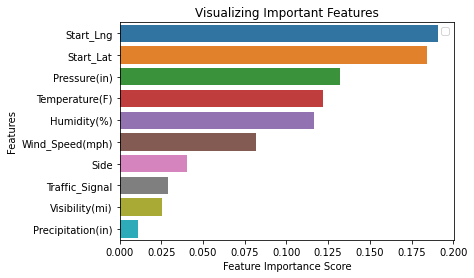

In [21]:
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [22]:
feature_imp

Start_Lng                              1.910921e-01
Start_Lat                              1.840078e-01
Pressure(in)                           1.323488e-01
Temperature(F)                         1.221722e-01
Humidity(%)                            1.165510e-01
Wind_Speed(mph)                        8.203238e-02
Side                                   4.055354e-02
Traffic_Signal                         2.897029e-02
Visibility(mi)                         2.556717e-02
Precipitation(in)                      1.116220e-02
Crossing                               1.024957e-02
Sunrise_Sunset                         6.766556e-03
Junction                               6.427526e-03
Fair                                   4.881263e-03
Stop                                   3.253022e-03
Mostly Cloudy                          3.168246e-03
Clear                                  2.997584e-03
Partly Cloudy                          2.860747e-03
Station                                2.453704e-03
Overcast    

## Decision Tree : Top feature graph

In [23]:
severity_classifier = DecisionTreeClassifier(max_leaf_nodes=11000, random_state=0)

In [24]:
severity_classifier.fit(x_train,y_train)
y_pred = severity_classifier.predict(x_test)
print(accuracy_score(y_pred,y_test)*100)

78.737


No handles with labels found to put in legend.


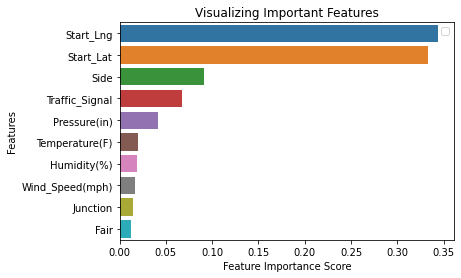

In [25]:
feature_imp = pd.Series(severity_classifier.feature_importances_,index=x.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Comparision Graph of different models used

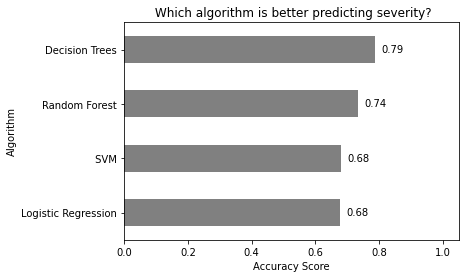

In [26]:

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
algo_lst=['Logistic Regression',' SVM','Decision Trees','Random Forest']
accuracy_lst = [0.678,0.680,0.787,0.735]
y_ticks=np.arange(len(algo_lst))
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.05)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title(' Which algorithm is better predicting severity?')

plt.show()